In [16]:
import pandas as pd

# Load the dataset
file_path = 'UberDataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic information to get an overview of the dataset
data_info = data.info()
first_rows = data.head()

display(data_info, first_rows)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


None

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
# Check for missing values and duplicate rows in the dataset
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

display(missing_values, duplicates)


START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

1

In [18]:
# Display a statistical summary of the numerical column(s)
statistical_summary = data.describe()

display(statistical_summary)


,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


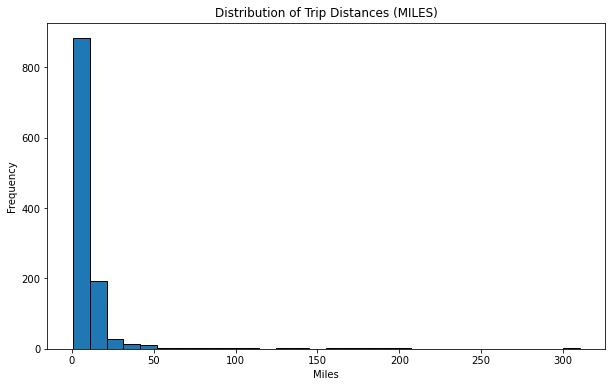

In [27]:
import matplotlib.pyplot as plt

# Plot a histogram for the MILES feature to show the distribution of trip distances
plt.figure(figsize=(10, 6))
plt.hist(data['MILES'], bins=30, edgecolor='black')
plt.title('Distribution of Trip Distances (MILES)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()




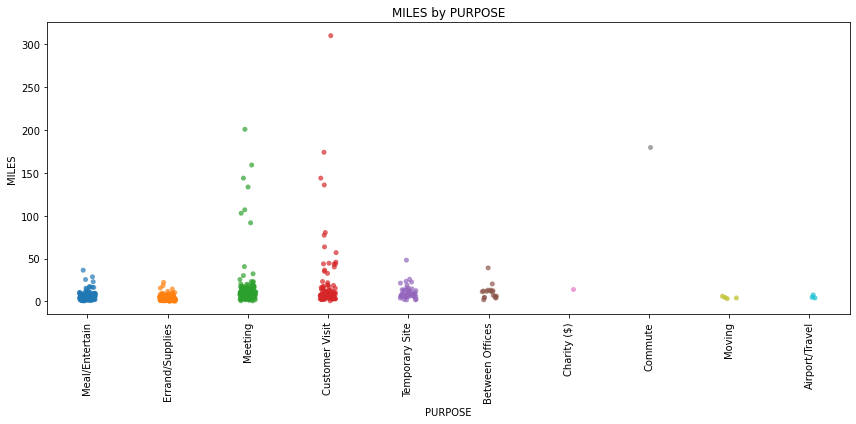

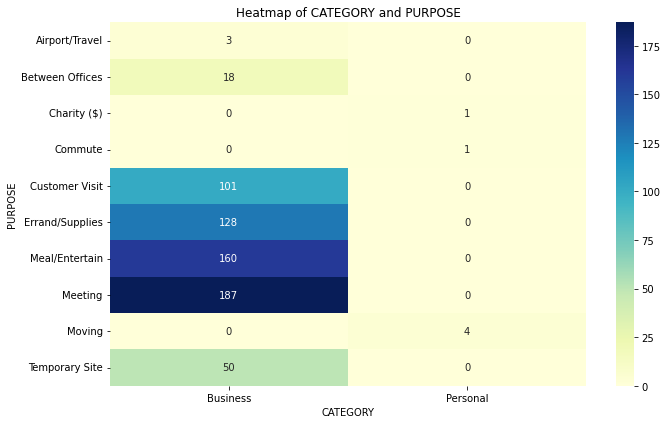

In [40]:
# Scatter plot of MILES by PURPOSE to visualize relationship
plt.figure(figsize=(12, 6))
sns.stripplot(data=data_cleaned, x='PURPOSE', y='MILES', jitter=True, alpha=0.7)
plt.title("MILES by PURPOSE")
plt.xlabel("PURPOSE")
plt.ylabel("MILES")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Heatmap for CATEGORY and PURPOSE association using Chi-Square contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap of CATEGORY and PURPOSE")
plt.xlabel("CATEGORY")
plt.ylabel("PURPOSE")
plt.tight_layout()
plt.show()


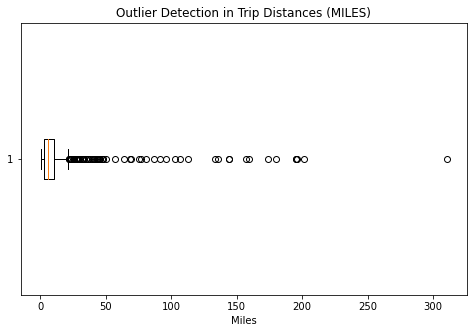

In [29]:
# Plot a box plot for the MILES feature to detect potential outliers
plt.figure(figsize=(8, 5))
plt.boxplot(data['MILES'], vert=False)
plt.title('Outlier Detection in Trip Distances (MILES)')
plt.xlabel('Miles')
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler

# Step 1: Drop rows with missing PURPOSE values
data_cleaned = data.dropna(subset=['PURPOSE'])

# Step 2: One-Hot Encode categorical variables (CATEGORY and PURPOSE)
data_encoded = pd.get_dummies(data_cleaned, columns=['CATEGORY', 'PURPOSE'], drop_first=True)

# Step 3: Standard Scale the MILES column
scaler = StandardScaler()
data_encoded['MILES'] = scaler.fit_transform(data_encoded[['MILES']])

# Display the preprocessed data
display(data_encoded)  # if using Jupyter Notebook or similar environment


,START_DATE,END_DATE,START,STOP,MILES,CATEGORY_Personal,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_Temporary Site
0,1/1/2016 21:11,1/1/2016 21:17,Fort Pierce,Fort Pierce,-0.265417,0,0,0,0,0,0,1,0,0,0
2,1/2/2016 20:25,1/2/2016 20:38,Fort Pierce,Fort Pierce,-0.278479,0,0,0,0,0,1,0,0,0,0
3,1/5/2016 17:31,1/5/2016 17:45,Fort Pierce,Fort Pierce,-0.282832,0,0,0,0,0,0,0,1,0,0
4,1/6/2016 14:42,1/6/2016 15:49,Fort Pierce,West Palm Beach,2.285867,0,0,0,0,1,0,0,0,0,0
5,1/6/2016 17:15,1/6/2016 17:19,West Palm Beach,West Palm Beach,-0.300247,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Kar?chi,Kar?chi,-0.456981,0,0,0,0,0,0,0,1,0,0
1151,12/31/2016 13:24,12/31/2016 13:42,Kar?chi,Unknown Location,-0.317662,0,0,0,0,0,0,0,0,0,1
1152,12/31/2016 15:03,12/31/2016 15:38,Unknown Location,Unknown Location,0.217846,0,0,0,0,0,0,0,1,0,0
1153,12/31/2016 21:32,12/31/2016 21:50,Katunayake,Gampaha,-0.208819,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Drop irrelevant columns for classification
X = data_encoded.drop(columns=['START_DATE', 'END_DATE', 'START', 'STOP', 'PURPOSE_Temporary Site'])
y = data_encoded['PURPOSE_Temporary Site']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_report_output = classification_report(y_test, y_pred)

accuracy, precision, recall, classification_report_output


(0.9770992366412213,
 0.9776577918450939,
 0.9770992366412213,
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       120\n           1       1.00      0.73      0.84        11\n\n    accuracy                           0.98       131\n   macro avg       0.99      0.86      0.91       131\nweighted avg       0.98      0.98      0.98       131\n')

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Cross-validation for Random Forest
rf_cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

# Train and evaluate Logistic Regression for comparison
log_reg_model = LogisticRegression(max_iter=200, random_state=42)
log_reg_cross_val_scores = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy').mean()

rf_cross_val_scores, log_reg_cross_val_scores


(0.9892307692307692, 0.9846153846153847)

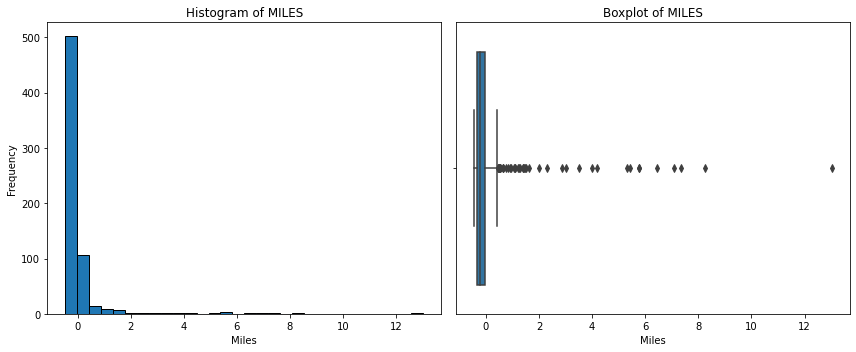

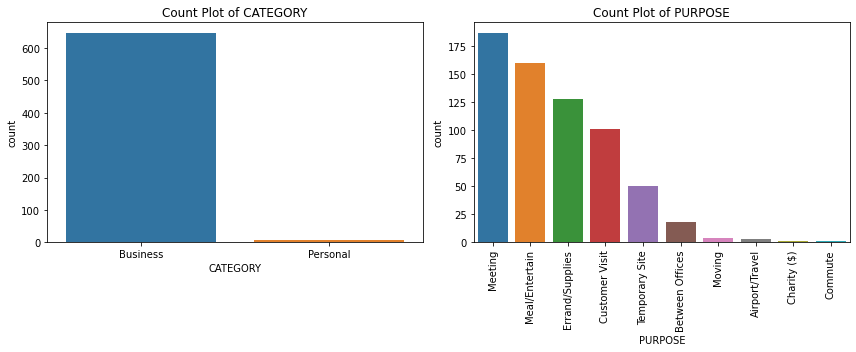

In [33]:
# Visualization of data distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram and boxplot for the numerical feature (MILES)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data_encoded['MILES'], bins=30, edgecolor='black')
plt.title('Histogram of MILES')
plt.xlabel('Miles')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_encoded['MILES'])
plt.title('Boxplot of MILES')
plt.xlabel('Miles')

plt.tight_layout()
plt.show()

# Bar plots for categorical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_cleaned, x='CATEGORY')
plt.title('Count Plot of CATEGORY')

plt.subplot(1, 2, 2)
sns.countplot(data=data_cleaned, x='PURPOSE', order=data_cleaned['PURPOSE'].value_counts().index)
plt.title('Count Plot of PURPOSE')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


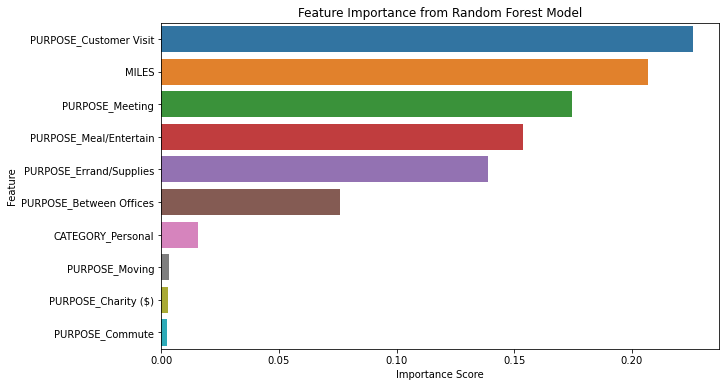

In [34]:
# Feature importance visualization for the Random Forest model
importances = model.feature_importances_
features = X.columns

# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


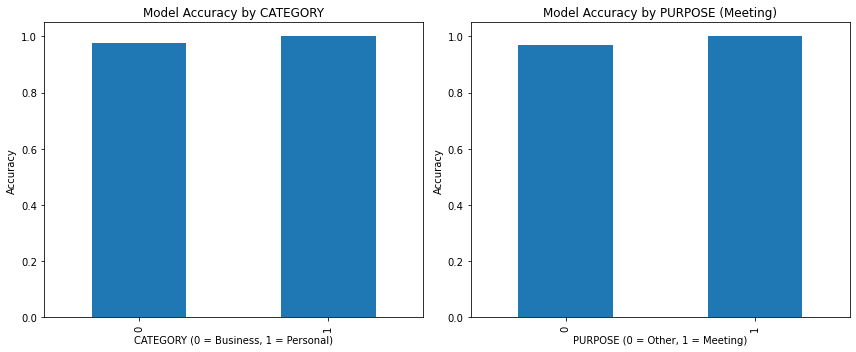

In [35]:
# Model performance by CATEGORY and PURPOSE

# Add predictions to the test set for comparison
X_test['Predicted_PURPOSE'] = y_pred
X_test['True_PURPOSE'] = y_test

# Calculate accuracy by CATEGORY and PURPOSE
category_accuracy = X_test.groupby('CATEGORY_Personal').apply(lambda x: (x['Predicted_PURPOSE'] == x['True_PURPOSE']).mean())
purpose_accuracy = X_test.groupby('PURPOSE_Meeting').apply(lambda x: (x['Predicted_PURPOSE'] == x['True_PURPOSE']).mean())

# Plot accuracy by CATEGORY and PURPOSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
category_accuracy.plot(kind='bar', title='Model Accuracy by CATEGORY', xlabel='CATEGORY (0 = Business, 1 = Personal)', ylabel='Accuracy')

plt.subplot(1, 2, 2)
purpose_accuracy.plot(kind='bar', title='Model Accuracy by PURPOSE (Meeting)', xlabel='PURPOSE (0 = Other, 1 = Meeting)', ylabel='Accuracy')

plt.tight_layout()
plt.show()
